# Rice Crop disease identifier
This projects itends to assist farmers with identifying rice crop disease using Machine Learning model

## Importing Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import skimage
from skimage.io import imread,imshow
from skimage.feature import hog
from skimage.transform import rescale,resize

## Importing the dataset

In [3]:
src_path={'Bacterial Blight Disease':'Rice_Diseases/Bacterial Blight Disease',
'Blast Disease':'Rice_Diseases/Blast Disease',
'Brown Spot Disease':'Rice_Diseases/Brown Spot Disease',
'False Smut Disease':'Rice_Diseases/False Smut Disease',
'Tungro':'Rice_Diseases/Tungro'}

bacterial_blight=[]
blast=[]
brown_spot=[]
false_smut=[]
tungro=[]

for disease, path in src_path.items():
    for file in os.listdir(path):
        if disease=='Bacterial Blight Disease':
            bacterial_blight.append(os.path.join(path, file))
        if disease=='Blast Disease':
            blast.append(os.path.join(path, file))
        if disease=='Brown Spot Disease':
            brown_spot.append(os.path.join(path, file))
        if disease=='False Smut Disease':
            false_smut.append(os.path.join(path, file))
        if disease=='Tungro':
            tungro.append(os.path.join(path, file))

In [4]:
print(bacterial_blight)
print(blast)
print(brown_spot)
print(false_smut)
print(tungro)

['Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_001.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_002.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_003.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_004.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_005.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_006.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_007.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_008.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_009.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_010.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_011.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_012.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_013.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_014.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTER

In [5]:
print(len(bacterial_blight))
print(len(blast))
print(len(brown_spot))
print(len(false_smut))
print(len(tungro))

1654
1510
1650
50
1308


## Visualisation

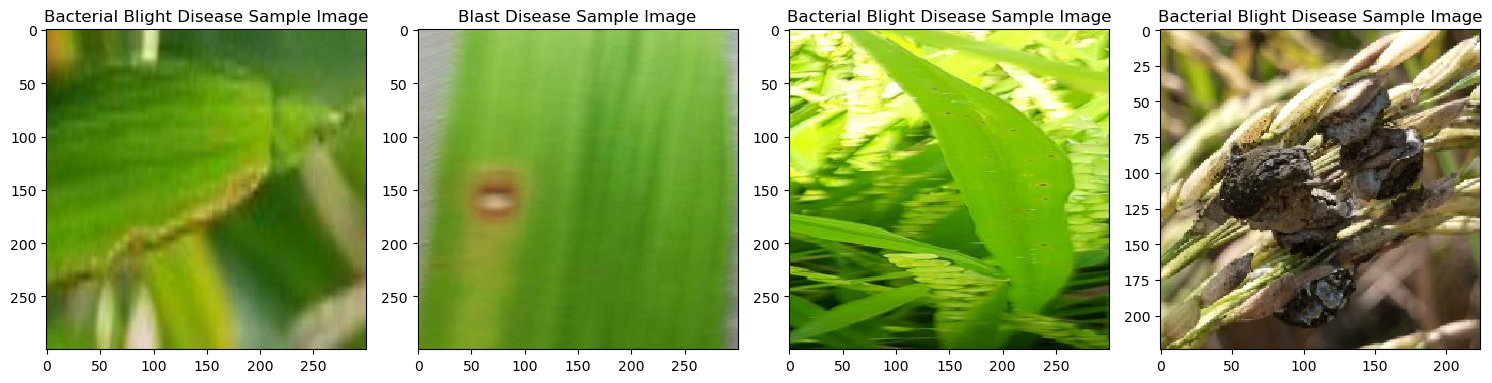

In [6]:
bacterial_sample_image=bacterial_blight[0]
blast_sample_image=blast[0]
brown_spot_sample_image=brown_spot[0]
false_smut_sample_image=false_smut[0]

fig=plt.figure(figsize=(15,8))
fig.add_subplot(1,4,1)
# plt.axis('off')
plt.title('Bacterial Blight Disease Sample Image')
imshow(bacterial_sample_image)

fig.add_subplot(1,4,2)
# plt.axis('off')
plt.title('Blast Disease Sample Image')
imshow(blast_sample_image)

fig.add_subplot(1,4,3)
# plt.axis('off')
plt.title('Bacterial Blight Disease Sample Image')
imshow(brown_spot_sample_image)

fig.add_subplot(1,4,4)
# plt.axis('off')
plt.title('Bacterial Blight Disease Sample Image')
imshow(false_smut_sample_image)

## Preprocess

In [7]:
combined_path_dataset=[]
for path in bacterial_blight:
    combined_path_dataset.append(path)

for path in blast:
    combined_path_dataset.append(path)

for path in brown_spot:
    combined_path_dataset.append(path)

for path in false_smut:
    combined_path_dataset.append(path)

for path in tungro:
    combined_path_dataset.append(path)

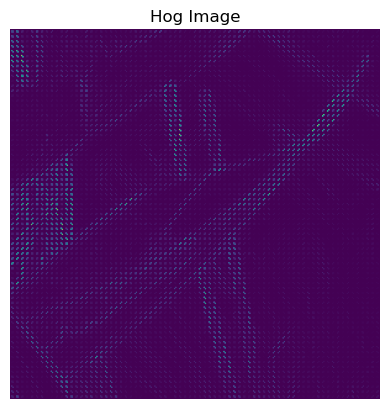

<function hog at 0x000002A5A53FD440>


In [8]:
path=combined_path_dataset[12]
image=imread(path,as_gray=True)
rescaled_image=resize(image,(200,200))
# dasify,daisified_image=daisy(rescaled_image,step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True)
# fig=plt.figure(figsize=(10,6))
# plt.subplot(1,2,1)
# imshow(rescaled_image)
# plt.subplot(1,2,2)
# imshow(image)
# print(dasify.shape)
hogify, hog_img = hog(
    image, orientations=8,
    pixels_per_cell=(4, 4),
    cells_per_block=(8,8),
    visualize=True
)

fig, ax = plt.subplots()
ax.axis("off")
ax.imshow(hog_img)
ax.set_title(f"Hog Image")
plt.show()
print(hog)

In [9]:
hogified_images=[]
for path in combined_path_dataset:
    image=imread(path,as_gray=True)
    resized_image=resize(image,(200,200))
    hogify= hog(resized_image, 
                orientations=8,
                pixels_per_cell=(8, 8),
                cells_per_block=(16,16)
                )
    print(hogify.shape)
    hogified_images.append(hogify)


(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)


## Building Dataset and Training Model 

In [10]:
x=hogified_images
y_bb=[]
y_bd=[]
y_bs=[]
y_fs=[]
y_t=[]
y=[]
for i in range(0,len(bacterial_blight)):
    y_bb.append(1)

for i in range(0,len(blast)):
    y_bd.append(2)

for i in range(0,len(brown_spot)):
    y_fs.append(3)

for i in range(0,len(false_smut)):
    y_bs.append(4)

for i in range(0,len(tungro)):
    y_t.append(5)

In [11]:
y=y_bb+y_bd+y_fs+y_bs+y_t
print(x[0].shape)
print(x[1])
print(y)

(204800,)
[0.00830217 0.00362818 0.02504194 ... 0.         0.         0.03751487]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
mlpc=MLPClassifier(activation='identity',alpha=0.0001,batch_size=32,hidden_layer_sizes=(150,150,150), learning_rate= 'adaptive',
                   max_iter=100,solver='adam',tol=1e-8,verbose=True)

mlpc.fit(xtrain,ytrain)

MemoryError: Unable to allocate 7.53 GiB for an array with shape (4937, 204800) and data type float64

In [ ]:
ypred=mlpc.predict(xtest)
print(f"accuracy:{accuracy_score(ypred,ypred)}")

accuracy:1.0


## Deploying the model

In [ ]:
# ['bz2', 'gzip', 'lzma', None, 'pickle', 'zipfile']
joblib.dump(mlpc,open("model_100.pkl",'wb'))


In [ ]:
mlpc=joblib.load(open('model_100.pkl','rb'))

In [ ]:
import sys
import numpy
import joblib

print("Python version:", sys.version)
print("Numpy version:", numpy.__version__)
print("Joblib version:", joblib.__version__)


Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:27:10) [MSC v.1938 64 bit (AMD64)]
Numpy version: 2.0.1
Joblib version: 1.4.2


In [ ]:
import sys
print(sys.executable)


d:\IDEs\anaconda\envs\rice-disease\python.exe
